### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

### Creating a synthetic dataset

In [3]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))


In [4]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data = x_data,columns=['X Data'])
y_df = pd.DataFrame(data = y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y
0,0.00000,5.382799
1,0.00001,4.086780
2,0.00002,5.048403
3,0.00003,5.326811
4,0.00004,4.529061


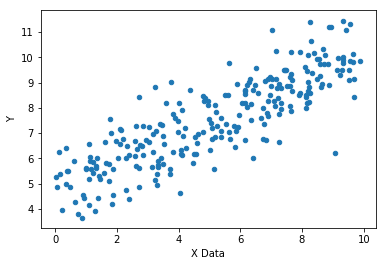

In [6]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

### Preparing for the learning. We will send data in batches. 

In [7]:
batch_size = 10

In [8]:
np.random.randn(2)

array([-0.07971299,  0.24494459])

### Creating Variables and placeholders
We initialize m and b with random numbers. Ideally we would want the final values to be: m= and b=5

In [9]:
m = tf.Variable(-0.07)
b = tf.Variable(0.25)

In [10]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

### Creating the model graph

In [11]:
y_model = m*xph + b 

### Setting up the error function. We use MSE

In [12]:
error = tf.reduce_sum(tf.square(yph-y_model))

### We create a Gradient Decent Optimizer, and tell it to optimize the error function created earlier

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [14]:
init = tf.global_variables_initializer()

### Running the session
1. We set a batch size. 
2. Select random rows. The number of rows = batch size. 
3. we feed the placeholders with these randomly selected values from data set

In [16]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        #selecting random integers to select rows
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

### Checking the final values of m and b after running the session

In [17]:
model_m

0.49001324

In [18]:
model_b

4.9467392

### Calculating the value of y from the model, and visualizing the result

In [19]:
y_hat = x_data*model_m + model_b

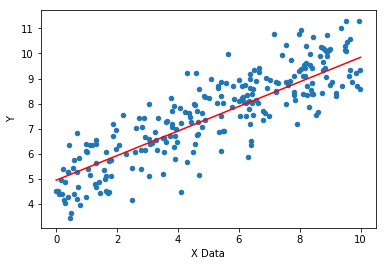

In [21]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')